In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

import quality

In [2]:
NUM_FEATURES = 6400
INPUT_PROFILES = "data/well_level_data.csv"

In [3]:
wells = pd.read_csv(INPUT_PROFILES)
columns2 = [str(i) for i in range(NUM_FEATURES)]

# Replicate correlation of treatments

In [4]:
CRM = np.corrcoef(wells[columns2])
controls = ["EMPTY_", "eGFP_CTRL", "Luciferase_CTRL", "LacZ_CTRL"]

In [5]:
# Compute replicate correlation on treated wells
replicate_correlations = []
treatments = [x for x in wells.pert_name.unique() if x not in controls]

for gene in treatments:
    idx = [i for i in wells[wells["pert_name"] == gene].index]
    rc = np.median(CRM[np.ix_(idx, idx)])
    replicate_correlations.append(rc)

In [6]:
# Compute a null distribution using random treated wells
null_distribution = []
treated_well_index = [x for x in wells[wells["pert_name"].isin(treatments)].index]

for k in range(1000):
    np.random.shuffle(treated_well_index)
    idx = treated_well_index[0:10]
    rc = np.median(CRM[np.ix_(idx, idx)])
    null_distribution.append(rc)

In [7]:
# Fraction of strong connections
quality.fraction_strong_test(replicate_correlations, null_distribution, len(treatments))

Treatments tested: 323
At 95th percentile of the null
Fraction strong: 85.45%
Null threshold: 0.0476


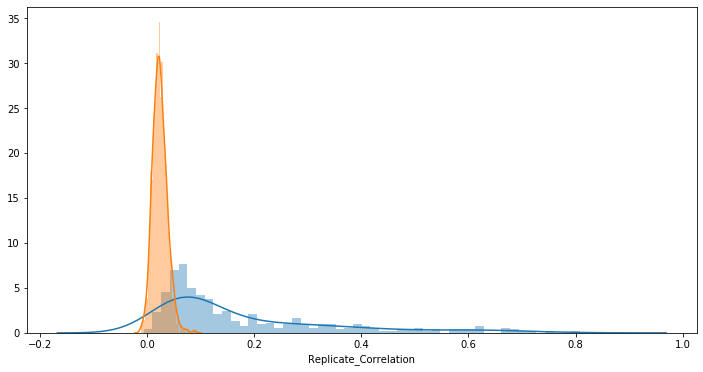

In [8]:
# Visualization of distributions
truereps = pd.DataFrame(data=replicate_correlations, columns=["Replicate_Correlation"])
null = pd.DataFrame(data=null_distribution, columns=["Replicate_Correlation"])

plt.figure(figsize=(12,6))
sb.distplot(truereps["Replicate_Correlation"], bins=50)
sb.distplot(null["Replicate_Correlation"], bins=50)

# Replicate correlation of controls

In [9]:
# Compute replicate correlation on treated wells
control_correlations = []
plates = [x for x in wells.Plate.unique()]

for plate in plates:
    for s in range(10):
        idx = [x for x in wells[wells["pert_name"].isin(controls)].query("Plate == " + str(plate)).index]
        np.random.shuffle(idx)
        idx = idx[0:10]
        rc = np.median(CRM[np.ix_(idx, idx)])
        control_correlations.append(rc)

In [10]:
# Compute a null distribution using random treated wells
control_null = []
control_well_index = [x for x in wells[wells["pert_name"].isin(controls)].index]

for k in range(1000):
    np.random.shuffle(control_well_index)
    idx = control_well_index[0:10]
    rc = np.median(CRM[np.ix_(idx, idx)])
    control_null.append(rc)

In [11]:
quality.fraction_strong_test(control_correlations, control_null, len(plates)*10)

Treatments tested: 50
At 95th percentile of the null
Fraction strong: 10.00%
Null threshold: 0.0017


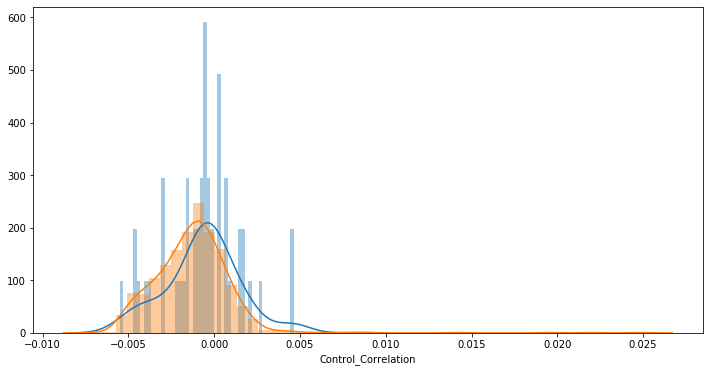

In [12]:
platereps = pd.DataFrame(data=control_correlations, columns=["Control_Correlation"])
platenull = pd.DataFrame(data=control_null, columns=["Control_Correlation"])

plt.figure(figsize=(12,6))
sb.distplot(platereps["Control_Correlation"], bins=50)
sb.distplot(platenull["Control_Correlation"], bins=50)